<center>
    <img alt="Olympic Logo" src="https://img.olympics.com/images/image/private/t_s_pog_staticContent_hero_md_2x/f_auto/primary/d1fpfljg04lwl1qje9rh" width=400>
</center>

# Explanatory Data Analysis and Seaborn Visualization (Olympic Games)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

## 1. Data import.

In [2]:
df_1 = pd.read_csv("/Users/mac/Desktop/Project I5/PDS-Project/datasets/3-dictionary.csv")
df_2=  pd.read_csv("/Users/mac/Desktop/Project I5/PDS-Project/datasets/3-summer.csv")
df_3 = pd.read_csv("/Users/mac/Desktop/Project I5/PDS-Project/datasets/3-winter.csv")

### 1.1. `Dictionary` data

In [3]:
print(f"Shape of dictionary dataframe: {df_1.shape}")
df_1.head()

Shape of dictionary dataframe: (201, 4)


,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


### 1.2. `Summer Olympics` data

In [4]:
print(f"Shape of summer dataframe: {df_2.shape}")
df_2.head()

Shape of summer dataframe: (31165, 9)


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### 1.3. `Winter Olympics` data

In [5]:
print(f"Shape of winter dataframe: {df_3.shape}")
df_3.head()

Shape of winter dataframe: (5770, 9)


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


## 2. Merging and Concatenating summer & winter.

In [6]:
df_1_copy = df_1.copy()
df_2_copy = df_2.copy()
df_3_copy = df_3.copy()

summer_winter_df = pd.merge(df_2_copy, df_3_copy, how='outer')

print(f"Shape of merged dataframe: {summer_winter_df.shape}")
summer_winter_df.sample(10)

Shape of merged dataframe: (36935, 9)


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
10978,1964,Tokyo,Basketball,Basketball,"ALACHACHAN, Armenak",URS,Men,Basketball,Silver
16486,1980,Moscow,Volleyball,Volleyball,"PAVLOVA, Larisa",URS,Women,Volleyball,Gold
26714,2004,Athens,Rowing,Rowing,"BAERG, Cameron",CAN,Men,Four Without Coxswain (4-),Silver
30097,2012,London,Equestrian,Eventing,"JUNG, Michael",GER,Men,Team,Gold
5057,1928,Amsterdam,Aquatics,Swimming,"SPENCE, Walter",CAN,Men,4X200M Freestyle Relay,Bronze
7358,1948,London,Athletics,Athletics,"HARNDEN, Arthur Harold",USA,Men,4X400M Relay,Gold
21881,1996,Atlanta,Basketball,Basketball,"LONCAR, Nikola",YUG,Men,Basketball,Silver
25109,2000,Sydney,Weightlifting,Weightlifting,"POPOVA, Valentina",RUS,Women,63KG,Silver
1523,1908,London,Hockey,Hockey,"ALLMAN-SMITH, Eric Percival",GBR,Men,Hockey,Silver
2749,1912,Stockholm,Shooting,Shooting,"PARNELL, Edward Louis",GBR,Men,"Rifle, Team",Silver


## 3. Data Cleaning.

In [7]:
summer_winter_df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [8]:
summer_winter_df.query("Country.isnull()")

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


### 3.1. Dealing with Missing Athletes Information

* [KUDUKHOV, Besik](https://www.google.com/search?q=KUDUKHOV%2C+Besik&oq=KUDUKHOV%2C+Besik&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIICAEQABgWGB4yCAgCEAAYFhgeMggIAxAAGBYYHjIICAQQABgWGB4yCAgFEAAYFhgeMggIBhAAGBYYHtIBCDEzODJqMGo5qAIAsAIB&sourceid=chrome&ie=UTF-8) is a Russian professional wrestler.

In [9]:
# Replace Country to RUS if the Athlete is "KUDUKHOV, Besik"
summer_winter_df.loc[summer_winter_df["Athlete"] == "KUDUKHOV, Besik", "Country"] = "RUS"
summer_winter_df[summer_winter_df['Athlete'] == "KUDUKHOV, Besik"]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29149,2008,Beijing,Wrestling,Wrestling Free.,"KUDUKHOV, Besik",RUS,Men,- 55KG,Bronze
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",RUS,Men,Wf 60 KG,Silver


In [10]:
summer_winter_df.query("Country.isnull()")

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver


In London Olympics 2012, 
* The Women Gold Medalist of 1500M Athletics is "[MARYAM, Yusuf Jamal](https://olympics.com/en/olympic-games/london-2012/results/athletics/1500m-women)" from `Bahrain/BRN`
* The Women Gold Medalist of 63Kg Weightlifting is [CHRISTINE, Girard](https://olympics.com/en/olympic-games/london-2012/results/weightlifting/63kg-women) from `CANADA/CAN`
* The Men Silver Medalist of 94Kg Weightlifting is [KIM, Min-Jae](https://olympics.com/en/olympic-games/london-2012/results/weightlifting/94kg-men) from `KOREA/KOR`

In [11]:
updates_athletes_info = [
    {
        "Year": 2012,
        "City": "London",
        "Sport": "Athletics",
        "Discipline": "Athletics",
        "Athlete": "MARYAM, Yusuf Jamal",
        "Country": "BRN",
        "Gender": "Women",
        "Event": "1500M",
        "Medal": "Gold",
    },
    {
        "Year": 2012,
        "City": "London",
        "Sport": "Weightlifting",
        "Discipline": "Weightlifting",
        "Athlete": "CHRISTINE, Girard",
        "Country": "CAN",
        "Gender": "Women",
        "Event": "63KG",
        "Medal": "Gold",
    },
    {
        "Year": 2012,
        "City": "London",
        "Sport": "Weightlifting",
        "Discipline": "Weightlifting",
        "Athlete": "KIM, Min-Jae",
        "Country": "KOR",
        "Gender": "Men",
        "Event": "94KG",
        "Medal": "Silver",
    },
]

# Update the Athletes info
for update_info in updates_athletes_info:
    condition = (
        (summer_winter_df["Year"] == update_info["Year"]) &
        (summer_winter_df["City"] == update_info["City"]) &
        (summer_winter_df["Sport"] == update_info["Sport"]) &
        (summer_winter_df["Discipline"] == update_info["Discipline"]) &
        (summer_winter_df["Event"] == update_info["Event"]) &
        (summer_winter_df["Medal"] == update_info["Medal"])
    )
    summer_winter_df.loc[condition, list(update_info.keys())] = list(update_info.values())

In [12]:
display(summer_winter_df[summer_winter_df['Athlete'] == "MARYAM, Yusuf Jamal"])
display(summer_winter_df[summer_winter_df['Athlete'] == "CHRISTINE, Girard"])
display(summer_winter_df[summer_winter_df['Athlete'] == "KIM, Min-Jae"])

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29600,2012,London,Athletics,Athletics,"MARYAM, Yusuf Jamal",BRN,Women,1500M,Gold
29603,2012,London,Athletics,Athletics,"MARYAM, Yusuf Jamal",BRN,Women,1500M,Gold


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31072,2012,London,Weightlifting,Weightlifting,"CHRISTINE, Girard",CAN,Women,63KG,Gold


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31091,2012,London,Weightlifting,Weightlifting,"KIM, Min-Jae",KOR,Men,94KG,Silver


In [13]:
summer_winter_df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

### 3.2. Checking Duplicated Value

In [14]:
# Check for duplicated values
summer_winter_df.duplicated().sum()

3

In [15]:
# Display duplicated values
display(summer_winter_df[summer_winter_df.duplicated()])

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
29603,2012,London,Athletics,Athletics,"MARYAM, Yusuf Jamal",BRN,Women,1500M,Gold
29780,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold


In [16]:
# Checking dataframe shape before dropped duplicated values
print(f"Before dropped duplicated values: {summer_winter_df.shape}")

Before dropped duplicated values: (36935, 9)


In [17]:
# Drop duplicated values
summer_winter_df.drop_duplicates(inplace=True)

In [18]:
# Checking dataframe shape after dropped duplicated values
print(f"After dropped duplicated values: {summer_winter_df.shape}")

After dropped duplicated values: (36932, 9)


### 3.3. Checking unique values of specific column of dataframe

In [19]:
# Check unique values
print(summer_winter_df['Country'].unique())
print(f"\nNumber of unique countries: {summer_winter_df['Country'].nunique()}")

['HUN' 'AUT' 'GRE' 'USA' 'GER' 'GBR' 'FRA' 'AUS' 'DEN' 'SUI' 'ZZX' 'NED'
 'BEL' 'IND' 'CAN' 'BOH' 'SWE' 'NOR' 'ESP' 'ITA' 'CUB' 'ANZ' 'RSA' 'FIN'
 'RU1' 'EST' 'TCH' 'NZL' 'BRA' 'JPN' 'LUX' 'ARG' 'POL' 'POR' 'URU' 'YUG'
 'ROU' 'HAI' 'EGY' 'PHI' 'IRL' 'CHI' 'LAT' 'MEX' 'TUR' 'PAN' 'JAM' 'SRI'
 'KOR' 'PUR' 'PER' 'IRI' 'TRI' 'URS' 'VEN' 'BUL' 'LIB' 'EUA' 'ISL' 'PAK'
 'BAH' 'BWI' 'TPE' 'ETH' 'MAR' 'GHA' 'IRQ' 'SIN' 'TUN' 'KEN' 'NGR' 'GDR'
 'FRG' 'UGA' 'CMR' 'MGL' 'PRK' 'COL' 'NIG' 'THA' 'BER' 'TAN' 'GUY' 'ZIM'
 'CHN' 'CIV' 'ZAM' 'DOM' 'ALG' 'SYR' 'SUR' 'CRC' 'INA' 'SEN' 'DJI' 'AHO'
 'ISV' 'EUN' 'NAM' 'QAT' 'LTU' 'MAS' 'CRO' 'ISR' 'SLO' 'IOP' 'RUS' 'UKR'
 'ECU' 'BDI' 'MOZ' 'CZE' 'BLR' 'TGA' 'KAZ' 'UZB' 'SVK' 'MDA' 'GEO' 'HKG'
 'ARM' 'AZE' 'BAR' 'KSA' 'KGZ' 'KUW' 'VIE' 'MKD' 'SCG' 'ERI' 'PAR' 'UAE'
 'SRB' 'SUD' 'MRI' 'TOG' 'TJK' 'AFG' 'BRN' 'GUA' 'GRN' 'TTO' 'BOT' 'MNE'
 'CYP' 'SGP' 'GAB' 'LIE']

Number of unique countries: 148


## 4. What Are The Most Successful Countries of All Times?

### 4.1. Most Successful Countries of All Times

In [20]:
# Group by Country and Medal, count each type of medal separately
medal_counts = (
    summer_winter_df.groupby(["Country", "Medal"])
    .size()
    .unstack(fill_value=0)  # use to create seperate columns for each medal types
)

medal_counts["Total_Medals"] = medal_counts.sum(axis=1, numeric_only=True)
most_successful_countries = medal_counts.sort_values("Total_Medals", ascending=False)
most_successful_countries.head(10)

Medal,Bronze,Gold,Silver,Total_Medals
Country,,,,
USA,1265,2402,1571,5238
URS,677,1088,724,2489
GBR,587,580,632,1799
GER,572,589,504,1665
FRA,578,444,526,1548
ITA,481,534,473,1488
SWE,505,476,496,1477
CAN,369,471,435,1275
AUS,479,317,408,1204


In [21]:
top_10_countries = most_successful_countries.iloc[:10]
display(top_10_countries)

Medal,Bronze,Gold,Silver,Total_Medals
Country,,,,
USA,1265,2402,1571,5238
URS,677,1088,724,2489
GBR,587,580,632,1799
GER,572,589,504,1665
FRA,578,444,526,1548
ITA,481,534,473,1488
SWE,505,476,496,1477
CAN,369,471,435,1275
AUS,479,317,408,1204


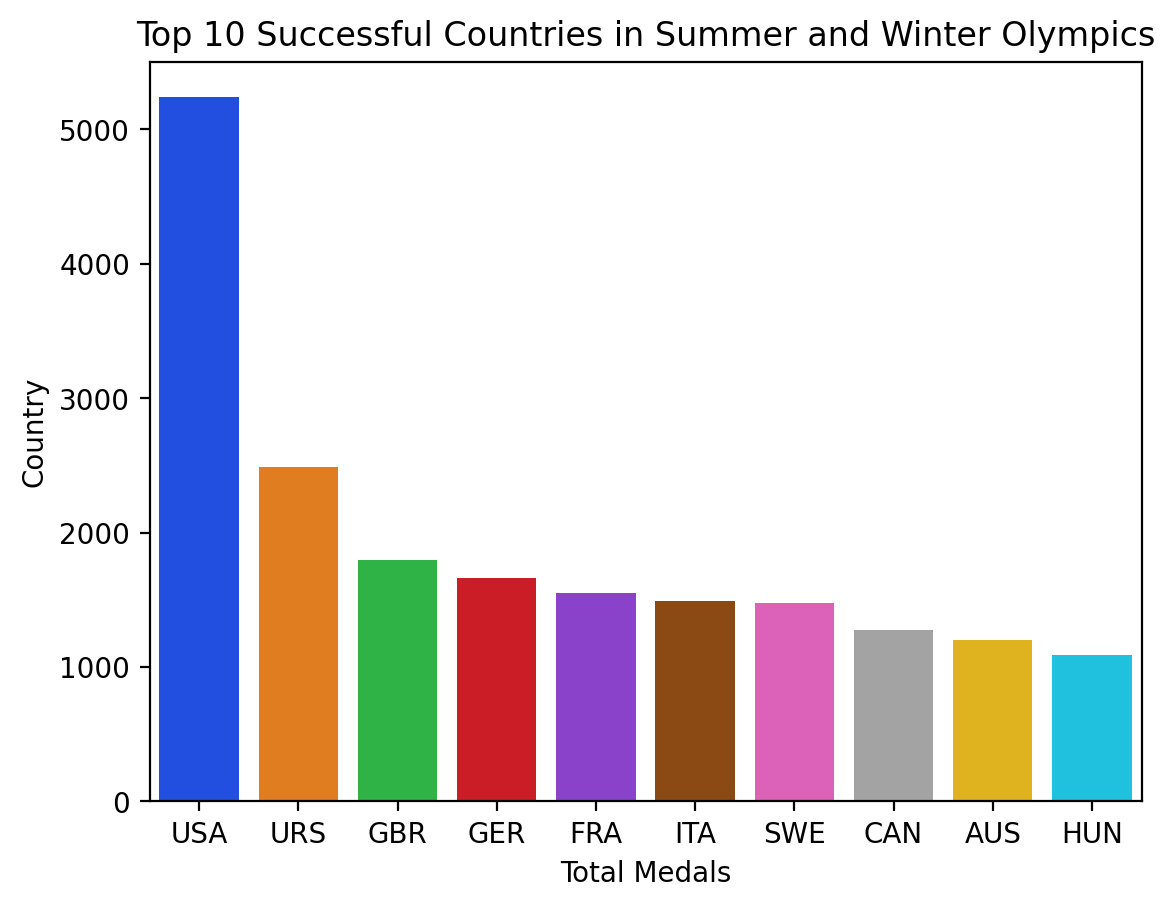

In [41]:
ax = sns.barplot(
    data=top_10_countries, 
    x="Country", 
    y="Total_Medals",
    palette="bright",
    hue="Country"
);

ax.set_title("Top 10 Successful Countries in Summer and Winter Olympics");
ax.set_xlabel("Total Medals");
ax.set_ylabel("Country");

<center>
    <img alt="USA" src="https://cdn.britannica.com/79/4479-050-6EF87027/flag-Stars-and-Stripes-May-1-1795.jpg" width=234>
    <img alt="URS" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_the_Soviet_Union.png/1024px-Flag_of_the_Soviet_Union.png" width=280>
    <img alt="GBR" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Flag_of_the_United_Kingdom_%281-2%29.svg/1200px-Flag_of_the_United_Kingdom_%281-2%29.svg.png" width=280>
    <img alt="GER" src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Flag_of_Germany.svg" width=235>
</center>
<center>
    <img alt="FRA" src="https://cdn.britannica.com/82/682-004-F0B47FCB/Flag-France.jpg" width=220>
    <img alt="ITA" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Flag_of_Italy.svg/1500px-Flag_of_Italy.svg.png" width=220>
    <img alt="SWE" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Sweden.svg/1200px-Flag_of_Sweden.svg.png" width=230>
    <img alt="CAN" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Canada_%28Pantone%29.svg/1200px-Flag_of_Canada_%28Pantone%29.svg.png" width=293>
</center>
<center>
    <img alt="AUS" src="https://upload.wikimedia.org/wikipedia/commons/8/88/Flag_of_Australia_%28converted%29.svg" width=260>
    <img alt="HUN" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Flag_of_Hungary.svg/1200px-Flag_of_Hungary.svg.png" width=260>
</center>

According to the data and graph:
* `USA` leads with a significant number of Gold medals (2402) and Total Medals (5238), far surpassing other countries.
* `URS (former Soviet Union)` follows with a strong performance, particularly in Gold (1088) and Total Medals (2489).
* Countries like `Great Britain (GBR)` and `Germany (GER)` show balanced distributions of Gold, Silver, and Bronze medals, while `Italy (ITA)` and `Canada (CAN)` have fewer total medals but still rank high in specific categories.

### 4.2. Most Successful Athletes of All Times

In [23]:
each_athlete_medal_count = (
    summer_winter_df.groupby(["Athlete", "Country", "Gender", "Medal"])
    .size()
    .unstack(fill_value=0)
)

each_athlete_medal_count["Total_Medals"] = each_athlete_medal_count.sum(axis=1, numeric_only=True)
most_successful_athletes = each_athlete_medal_count.sort_values("Total_Medals", ascending=False)

In [24]:
# Filter for male athletes and take the top 5
top_5_men = most_successful_athletes[
    most_successful_athletes.index.get_level_values("Gender") == "Men"
].head(5)

# Filter for female athletes and take the top 5
top_5_women = most_successful_athletes[
    most_successful_athletes.index.get_level_values("Gender") == "Women"
].head(5)

# Display results
print("Top 5 Male Athletes:")
display(top_5_men)

print("\nTop 5 Female Athletes:")
display(top_5_women)


Top 5 Male Athletes:


,,Medal,Bronze,Gold,Silver,Total_Medals
Athlete,Country,Gender,,,,
"PHELPS, Michael",USA,Men,2,18,2,22
"ANDRIANOV, Nikolay",URS,Men,3,7,5,15
"ONO, Takashi",JPN,Men,4,5,4,13
"SHAKHLIN, Boris",URS,Men,2,7,4,13
"BJOERNDALEN, Ole Einar",NOR,Men,1,8,4,13



Top 5 Female Athletes:


,,Medal,Bronze,Gold,Silver,Total_Medals
Athlete,Country,Gender,,,,
"LATYNINA, Larisa",URS,Women,4,9,5,18
"COUGHLIN, Natalie",USA,Women,5,3,4,12
"TORRES, Dara",USA,Women,4,4,4,12
"THOMPSON, Jenny",USA,Women,1,8,3,12
"CASLAVSKA, Vera",TCH,Women,0,7,4,11


## 5. Do GDP, Population and Politics Matter?

In [25]:
df_1.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


### 5.1. Top 10 Highest GDP Countries

In [26]:
top_10_highest_GDP_countries = df_1.sort_values(
    "GDP per Capita", ascending=False
).reset_index(drop=True).head(10)

# top_10_highest_GDP_countries["GDP per Capita"] = top_10_highest_GDP_countries["GDP per Capita"] / 1_000_000
# top_10_highest_GDP_countries.rename(columns={"GDP per Capita": "GDP per Capita  (Million USD)"}, inplace=True)

display(top_10_highest_GDP_countries)

,Country,Code,Population,GDP per Capita
0,Luxembourg,LUX,569676.0,101449.968168
1,Switzerland,SUI,8286976.0,80945.079219
2,Norway,NOR,5195921.0,74400.369777
3,Qatar,QAT,2235355.0,73653.394435
4,Ireland,IRL,4640703.0,61133.672427
5,Australia,AUS,23781169.0,56310.962993
6,United States,USA,321418820.0,56115.718426
7,Singapore,SIN,5535002.0,52888.744672
8,Denmark,DEN,5676002.0,51989.293471
9,Sweden,SWE,9798871.0,50579.673649


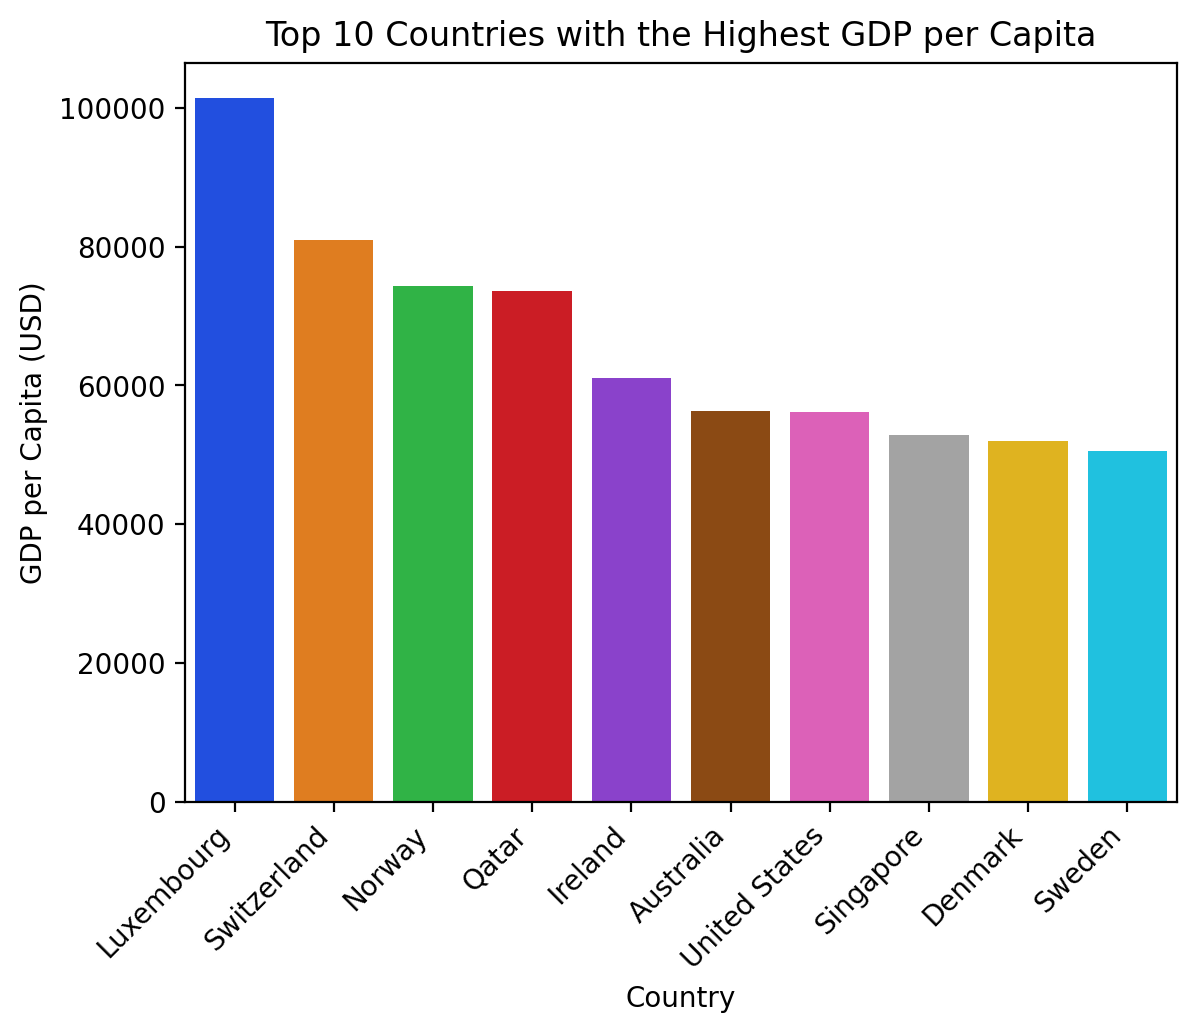

In [ ]:
ax = sns.barplot(
    data=top_10_highest_GDP_countries,
    x="Country",
    y="GDP per Capita",
    palette="bright",
    hue="Country",
);

ax.set_title("Top 10 Countries with Highest GDP per Capita");
ax.set_xlabel("Country");
ax.set_ylabel("GDP per Capita (USD)");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

## 6. Statistical Analysis and Hypothesis Testing with scipy.

## 7. Aggregating and Ranking.

## 8. Summer Games Vs. Winter Games (Does Geographical Location Matter?)

## 9. Men Vs. Women - Does Culture & Religion Matter?

## 10. Do Traditions Matter?